# Ford GoBike System Data Exploration
## by Ahmed Hbaieb

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd      
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
df = pd.read_csv('fordgobike_tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

Some ID columns should be transformed to string type or removed

Some date columns should be transformed to datetime 

I think the duration should be in hours or minutes and not in seconds 

In [5]:
df.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


Seems like there are some missing values 

### What is the structure of your dataset?

> Our dataset contains 183412 rows and 16 columns 

> It contains a lot of Numerical features in which some of them are discrete and continuous 

> It contains categorical ones , some of them are binary  


### What is/are the main feature(s) of interest in your dataset?

> Trip duration

> Member gender 

> Member age 

> Week days 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think all of these features can help us solve the problem of our analysis except for some useless ones that I think I will proceed to remove them 

### Some cleaning first 


In [6]:
# function declaration for future purposes 
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

# order we will use for the future 
Day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True , ascending=False)
missing_value_df 

,percent_missing
member_birth_year,4.506248
member_gender,4.506248
start_station_id,0.107408
start_station_name,0.107408
end_station_id,0.107408
end_station_name,0.107408
duration_sec,0.000000
start_time,0.000000
end_time,0.000000
start_station_latitude,0.000000


We have some missing values that need to be taken care of . 

Since some columns have 0.1% missing values , those observations will be removed 

For columns with 4% missing values , I think they should be replaced with the most frequent value or the mean 

In [8]:
df.dropna(subset=['end_station_name','end_station_id','start_station_name','start_station_id'] , inplace=True)
df['member_birth_year'].fillna(df['member_birth_year'].mean(), inplace=True)
df['member_gender'].fillna(df['member_gender'].mode().iloc[0], inplace=True)
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

No missing values now , Looks good ! 

In [9]:
df['duration_hours'] = df['duration_sec'] / 3600 
df.drop(columns=['duration_sec'],inplace=True)
df['duration_hours'].describe()

count    183215.000000
mean          0.201639
std           0.498633
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hours, dtype: float64

Since we have the duration of our trips I think that columns like 'start_time' and 'end_time' will not be needed for our analysis . 

Furthermore most of our trips last for 0.2 of an hour (12 minutes ) meaning that the day of our start_time and end_time are the same . 

I think dropping those columns is better , but before that we might need to extract the day from these dates 

Since we have the station's name , it is useless to have its ID 

We can also extract the day of the week from our start date column and then remove it 

In [10]:
df['Day'] = pd.DatetimeIndex(df['start_time']).strftime('%A')  
df.drop(columns=['start_time','end_time','end_station_id','start_station_id'],inplace=True)

Bike ID should be of type object and not Int

In [11]:
df['bike_id'] = df['bike_id'].astype('str')

We need to extract the age from a member's birth year 

In [12]:
df['Age'] = 2022 - df.member_birth_year
df.drop(columns=['member_birth_year'],inplace=True)

In [13]:
df.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_hours,Day,Age
0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,14.495833,Thursday,38.000000
1,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Male,No,11.811389,Thursday,37.196865
2,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,17.181667,Thursday,50.000000
3,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,10.136111,Thursday,33.000000
4,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,0.440278,Thursday,48.000000


Everything is good for our analysis now ! 

## Univariate Exploration

In this section we are going to analyze different distributions of our features and see if there are any outliers 


### Distribution of User Types 

First Let's see what user types we have

Subscribers :  163414  | pourcentage :  89.19247878175914 %
Customers   :  19801   | pourcentage :  10.807521218240865 %


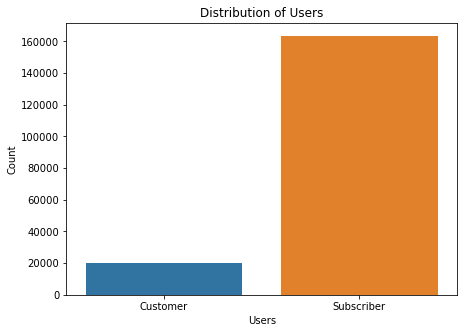

In [14]:
plt.figure(figsize = (7,5))
sns.countplot(data= df ,  x='user_type'  )
plt.xlabel('Users')
plt.ylabel('Count')
plt.title("Distribution of Users")
print('Subscribers : ' ,len( df[df['user_type']=='Subscriber' ] ) ,' | pourcentage : ' , len( df[df['user_type']=='Subscriber' ] )*100/len(df),'%' )
print('Customers   : ' ,len( df[df['user_type']=='Customer' ] ) ,'  | pourcentage : ' , len( df[df['user_type']=='Customer' ] )*100/len(df),'%' )


It looks like customers only represent 10% of our Data 

### Distribution of Genders

Males     :  138763  | pourcentage :  75.73779439456376 %
Females   :  40805   | pourcentage :  22.271648063750238 %
Others    :  3647    | pourcentage :  1.9905575416859973 %


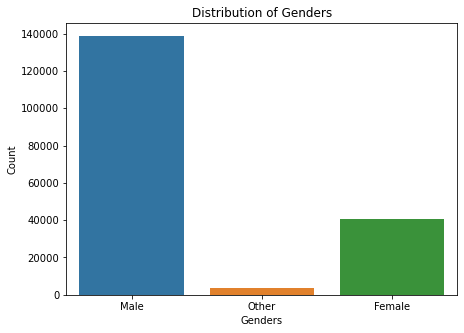

In [15]:
plt.figure(figsize = (7,5))
sns.countplot(data = df ,  x = 'member_gender');
plt.xlabel('Genders')   
plt.ylabel('Count')
plt.title("Distribution of Genders");
print('Males     : ' ,len( df[df['member_gender']=='Male' ] ) ,' | pourcentage : ' , len( df[df['member_gender']=='Male' ] )*100/len(df),'%' )
print('Females   : ' ,len( df[df['member_gender']=='Female' ] ) ,'  | pourcentage : ' , len( df[df['member_gender']=='Female' ] )*100/len(df),'%' )
print('Others    : ' ,len( df[df['member_gender']=='Other' ] ) ,'   | pourcentage : ' , len( df[df['member_gender']=='Other' ] )*100/len(df),'%' )

Males seem to be leading the majority of our data with 75% followed by Female 22% and then Others 2%

### Distribution of Week days 

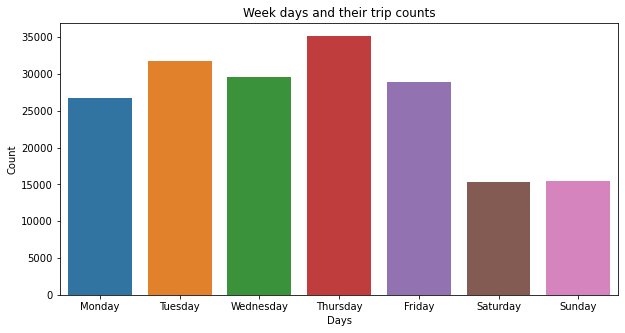

In [16]:
plt.figure(figsize = (10,5))

sns.countplot( data = df , x = 'Day' , order=Day_order);
plt.xlabel('Days')
plt.ylabel('Count')
plt.title("Week days and their trip counts");

Thursday seems to be the most active day out of all the other days 

### Distribution of Start and End Stations 

Here is the list of the Top 10 starting stations

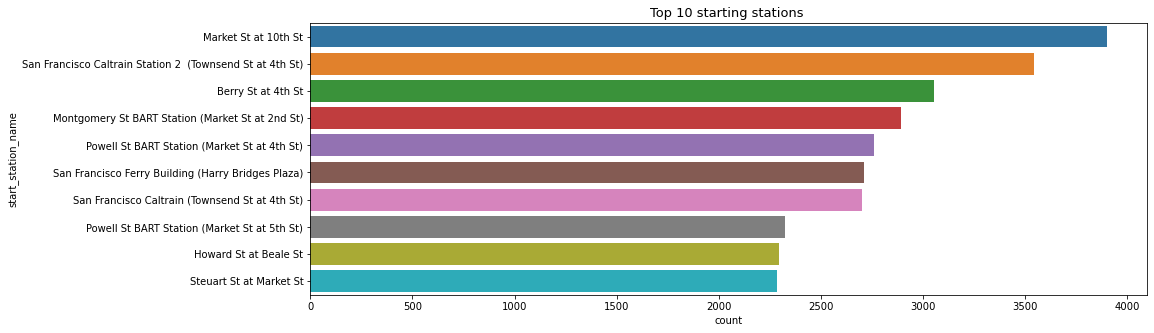

In [56]:
plt.figure(figsize = (15,5))
plt.title("Top 10 starting stations ", fontsize=13);

start_stations = df['start_station_name'].value_counts().head(10).index
sns.countplot(data=df, y='start_station_name', order=start_stations);   

Here is the list of the Top 10 Ending stations

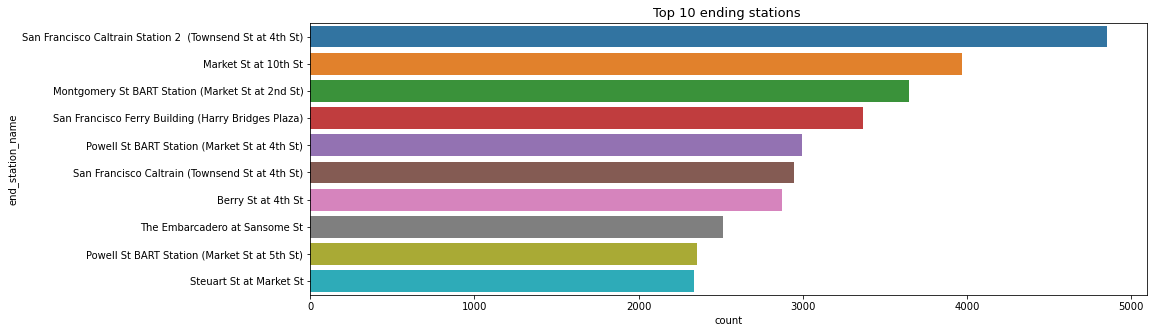

In [55]:
plt.figure(figsize = (15,5))   
plt.title("Top 10 ending stations ", fontsize=13);

end_stations = df['end_station_name'].value_counts().head(10).index
sns.countplot(data=df, y='end_station_name', order=end_stations);

### Distribution of Latitudes and Longitudes 

For Latitudes their distributions are left skewed 

<AxesSubplot:xlabel='end_station_latitude', ylabel='Density'>

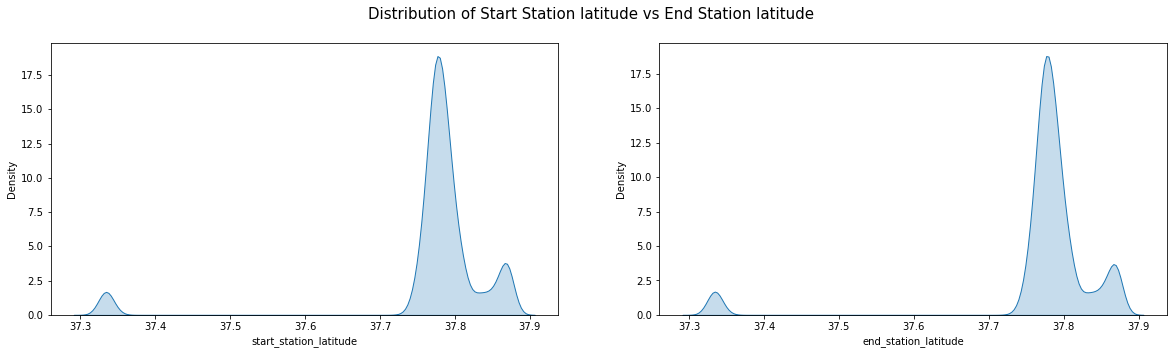

In [54]:
plt.figure(figsize = [20, 5]) 
plt.suptitle('Distribution of Start Station latitude vs End Station latitude', fontsize=15)

plt.subplot(1, 2, 1) 
sns.kdeplot(data = df, x = 'start_station_latitude' ,fill=True ) 
plt.subplot(1, 2, 2) 
sns.kdeplot(data = df, x = 'end_station_latitude' ,fill=True ) 

For Longitudes their distributions are right skewed 

<AxesSubplot:xlabel='end_station_longitude', ylabel='Density'>

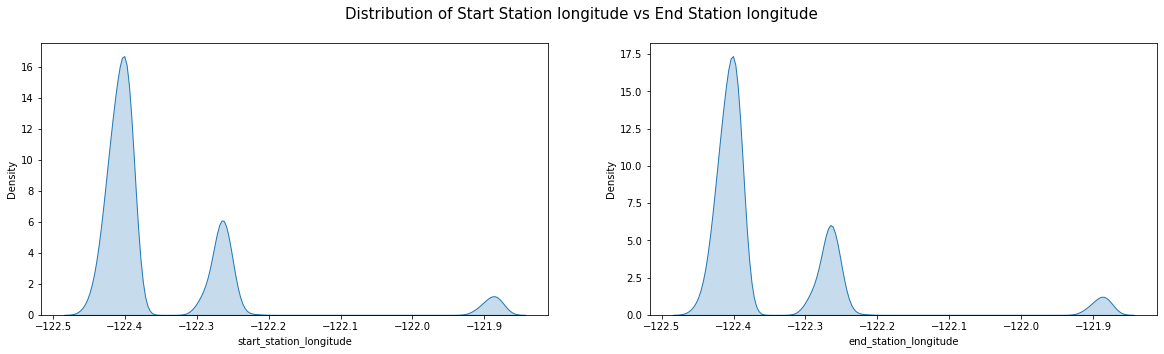

In [53]:
plt.figure(figsize = [20, 5]) 
plt.suptitle('Distribution of Start Station longitude vs End Station longitude', fontsize=15)
plt.subplot(1, 2, 1) 
sns.kdeplot(data = df , x = 'start_station_longitude' , fill=True)

plt.subplot(1, 2, 2) 
sns.kdeplot( data = df ,  x = 'end_station_longitude', fill=True)

### Distribution of Age 

It is right skewed , we seem to have some outliers starting from 120 

<AxesSubplot:title={'center':'Distribution of age  '}, xlabel='Age'>

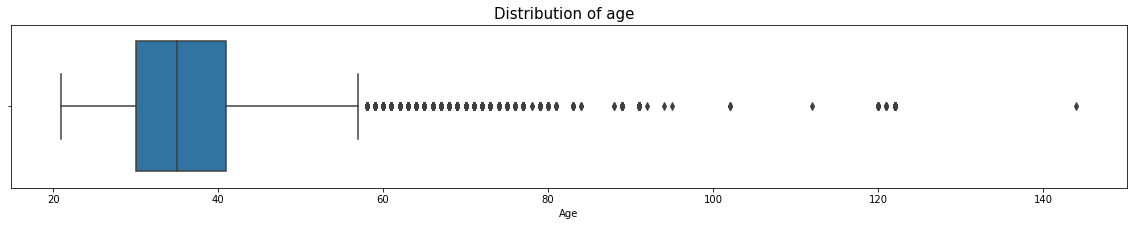

In [51]:
plt.figure(figsize=(20,3))
plt.title("Distribution of age  ", fontsize=15);

sns.boxplot( data = df , x =  df.Age)

### Distribution of Trip durations  

<AxesSubplot:title={'center':'Distribution of duration in hours   '}, xlabel='duration_hours'>

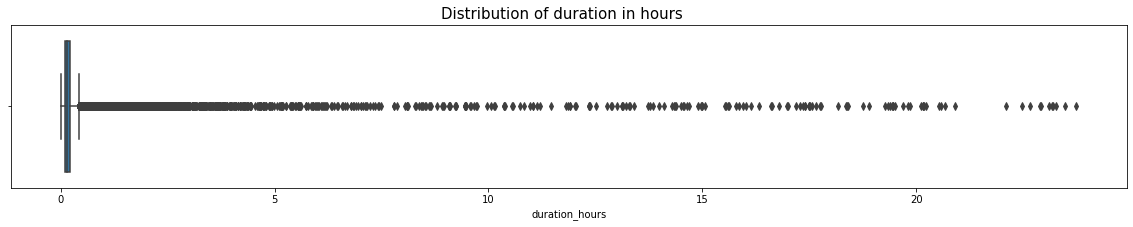

In [50]:
plt.figure(figsize=(20,3))
plt.title("Distribution of duration in hours   ", fontsize=15);

sns.boxplot( data = df , x =  df.duration_hours)

In [23]:
df.duration_hours.describe()

count    183215.000000
mean          0.201639
std           0.498633
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hours, dtype: float64

75% of our durations have a value less than 0.22 of an hour (13 minutes) , we seem to have a lot of outliers 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The age variable has a good distribution , on average people were in their mid 30's and early 40's , except for some outliers who were aged above 120 . 

- Most of our observations are males and subscribers

- The duration variable had an average of 0.2 of an hour (12minutes)  and  75% of our observations have a duration time of less than 0.22  (13 minutes) , There were a lot of outliers in this variable but I guess those are extreme trips done once in a while , they are not commun  

- Thursdays tend to be the days with the most activity 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some outliers in the age feature that need to be taken care of 

## Bivariate Exploration

> In this section, I am going to investigate relationships between pairs of variables in the data 

### Distribution of Age per Gender

<AxesSubplot:title={'center':'Distribution of age for each gender   '}, xlabel='Age', ylabel='member_gender'>

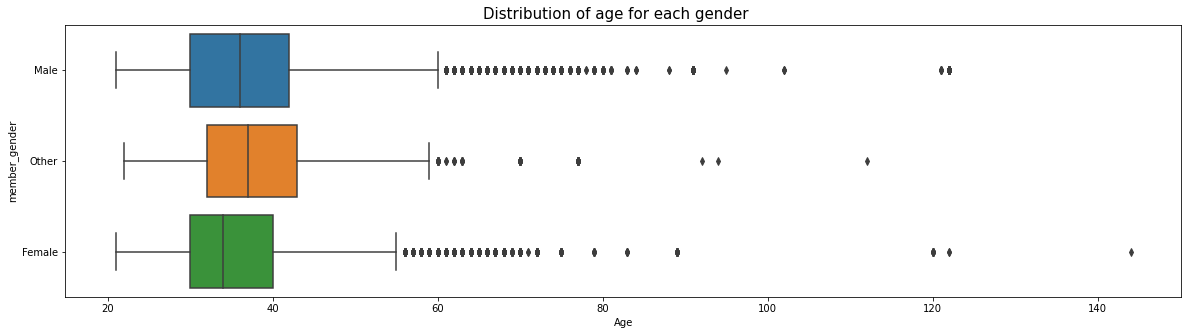

In [49]:
plt.figure(figsize = (20,5))  
plt.title("Distribution of age for each gender   ", fontsize=15);

sns.boxplot(x=df.Age , y=df.member_gender )   

### Average trip duration per gender

<AxesSubplot:title={'center':'Average trip duation for each gender    '}, xlabel='duration in hours', ylabel='member_gender'>

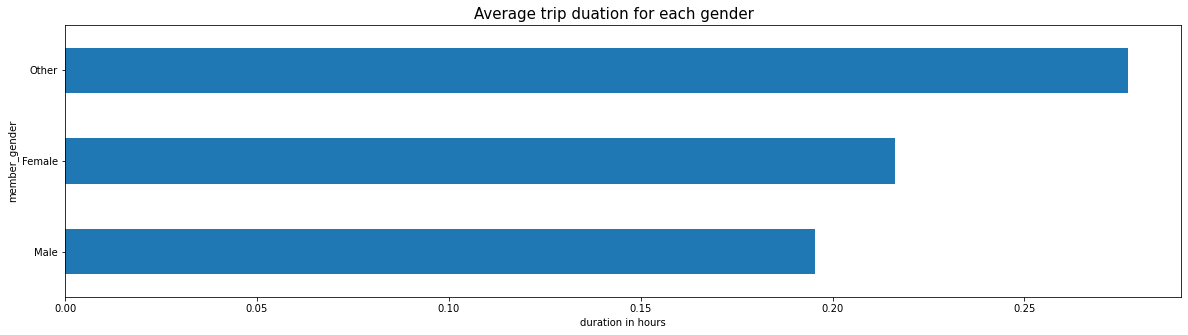

In [62]:
plt.figure(figsize = (20,5))    
plt.title("Average trip duation for each gender    ", fontsize=15);
plt.xlabel('duration in hours')

df.groupby('member_gender')['duration_hours'].mean().sort_values(ascending=False).head()[3::-1].plot(kind='barh')

It looks like Females tend to spend more times on Trips than Males 

### Age distribution per User Type

<AxesSubplot:title={'center':'Distribution of age for each user type  '}, xlabel='Age', ylabel='user_type'>

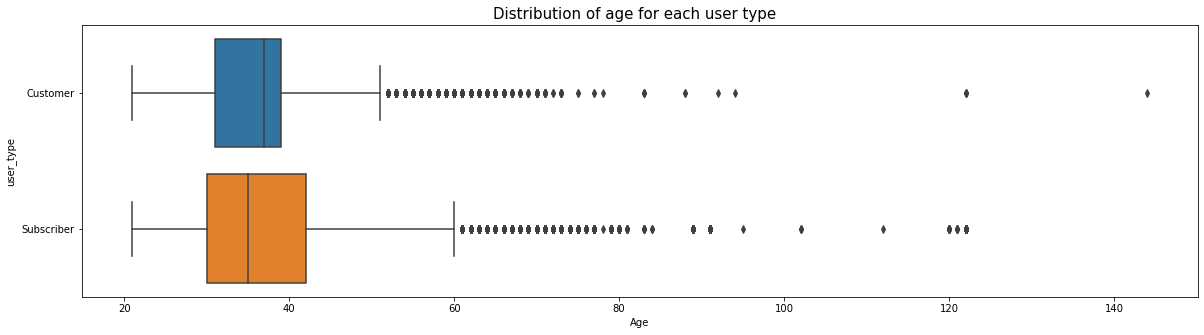

In [47]:
plt.figure(figsize = (20,5))  
plt.title("Distribution of age for each user type  ", fontsize=15);

sns.boxplot(x=df.Age , y=df.user_type )    

Looking by the median it looks like subscribers tend to be younger that customers 

### Average trip duration per User Type

<AxesSubplot:title={'center':'average trip duration per user type   '}, xlabel='duration in hours', ylabel='user_type'>

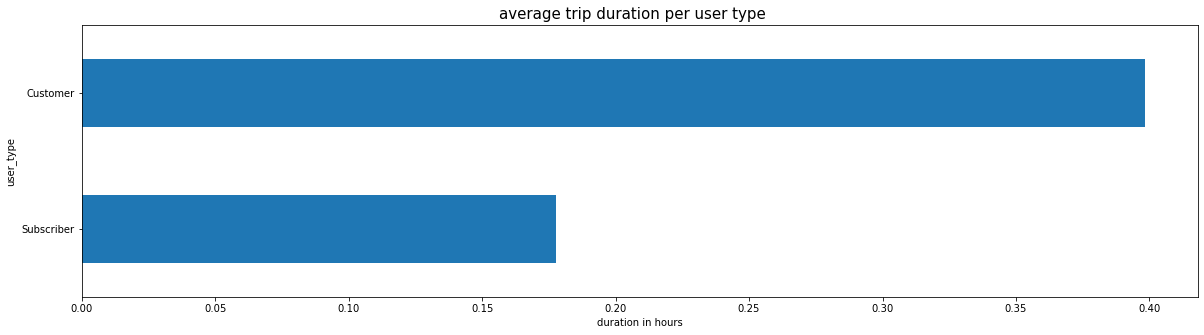

In [61]:
plt.figure(figsize = (20,5))  
plt.title("average trip duration per user type   ", fontsize=15);
plt.xlabel('duration in hours')

df.groupby('user_type')['duration_hours'].mean().sort_values(ascending=False).head()[2::-1].plot(kind='barh')

Customers tend to spend more time on trips 

### Distribution of user types per Gender

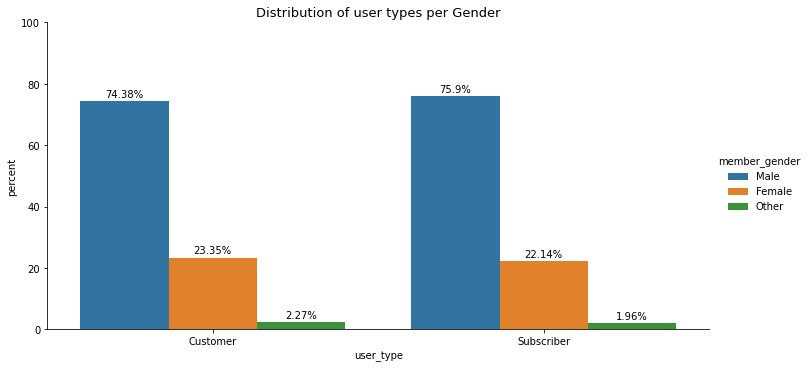

In [44]:
categ_bar_pourcent(df,'user_type','member_gender',2)   
plt.title("Distribution of user types per Gender" , fontsize=13);



## User Type activities during week days 

Seems like customers prefer to attend trips on weekends more than the rest of the weekdays  



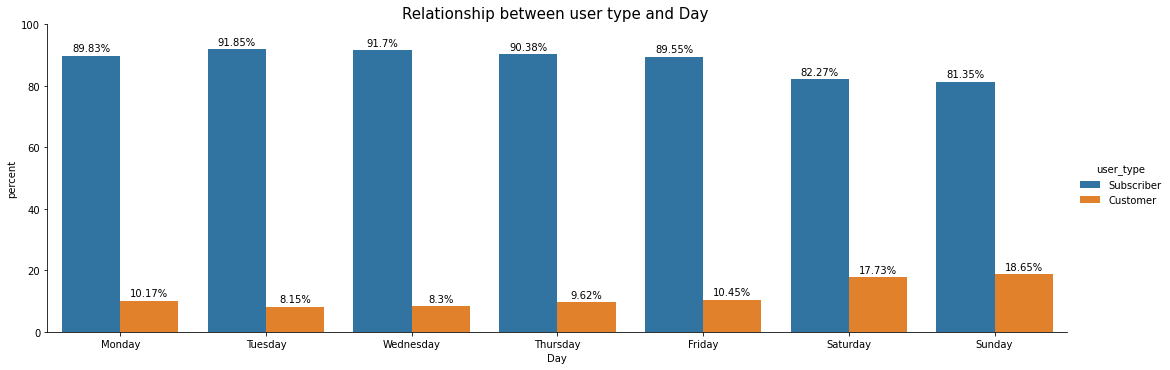

In [58]:
categ_bar_pourcent(df,'Day','user_type',3 , Order=Day_order)     
plt.title("Relationship between user type and Day " , fontsize=15);

 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Customers prefer to attend trips on weekends more than the rest of the weekdays

- Customers tend to spend more time on trips than subscribers 

- Females tend to spend more times on Trips than Males 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The gender 'other' tends to have the most duration time in trips 

## Multivariate Exploration

> Here we are going to Create plots of three or more variables to investigate our data even further

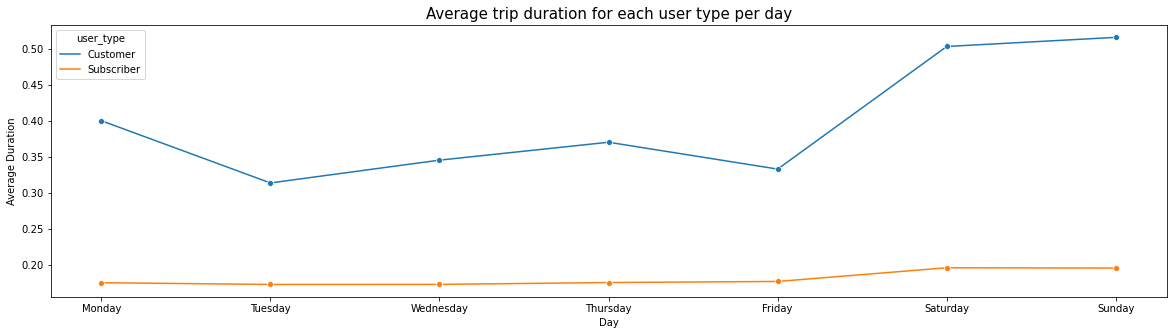

In [59]:
df['Day'] = pd.Categorical(df['Day'], categories=Day_order , ordered=True)
df_avg = df.groupby(['user_type','Day']).duration_hours.mean()
df_avg = df_avg.reset_index()
        
# plot a line plot with colors based on user_type
plt.figure(figsize=[20,5])
sns.lineplot(data = df_avg, x='Day', y='duration_hours', hue='user_type', marker='o')
plt.title("Average trip duration for each user type per day",fontsize = 15)
plt.ylabel('Average Duration'); 

Customers tend to last the most on Sundays

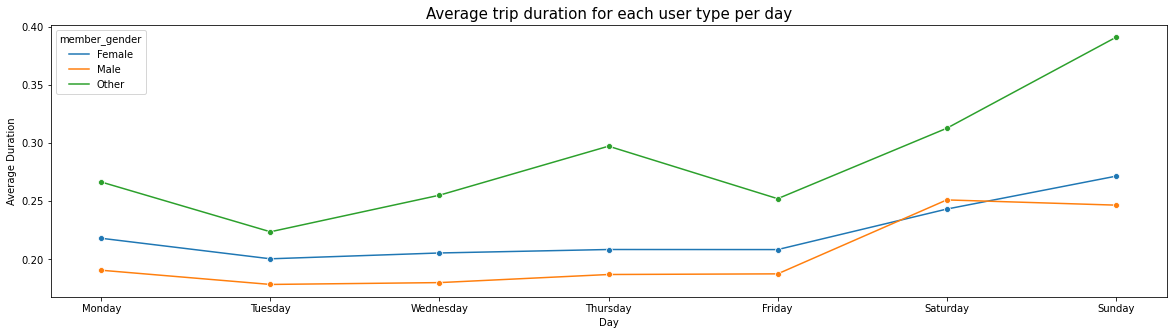

In [60]:
df_avg = df.groupby(['member_gender','Day']).duration_hours.mean()
df_avg = df_avg.reset_index()
# plot a line plot with colors based on user_type
plt.figure(figsize=[20,5])
sns.lineplot(data = df_avg, x='Day', y='duration_hours', hue='member_gender', marker='o')
plt.title("Average trip duration for each user type per day",fontsize = 15)
plt.ylabel('Average Duration');

Most of the time Females tend to spend more on their trips but it is not always the case for Saturdays since Males tend to make an exception 

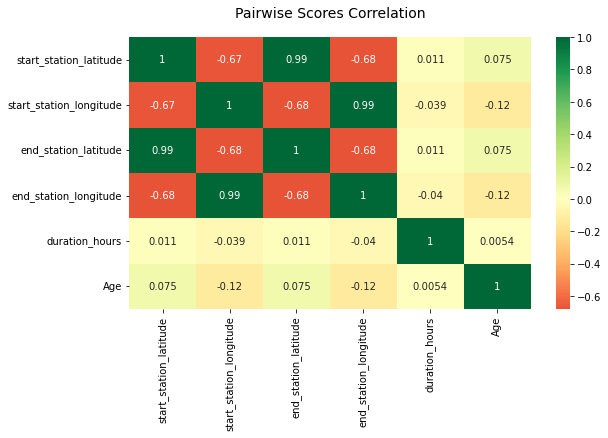

In [32]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', center=0,)
plt.title('Pairwise Scores Correlation', fontsize=14, y=1.05);

This overall correlation heatmap shows up that there are no major correlations between our features 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Customers tend to last the most on Sundays 

### Were there any interesting or surprising interactions between features?

> The male duration surpassing the female one on Saturdays was interesting

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.


In [33]:
#df.to_csv('fordgobike_tripdata_clean.csv', index=False)  